In [1]:
!pip install llama-index-core llama-parse llama-index-readers-file python-dotenv
!pip install lancedb pandas sentence_transformers
!pip install langchain_google_genai langchain_community typing
!pip install Levenshtein
!pip install langgraph
!pip install -U langchain-community tavily-python
!export TAVILY_API_KEY="API KEY"
!pip install -U -q chainlit


'export' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# from llama_parse import LlamaParse
# from llama_index.core import SimpleDirectoryReader
# import nest_asyncio
# from langchain_text_splitters import RecursiveCharacterTextSplitter
# import pandas as pd
# import lancedb
# from lancedb.embeddings import get_registry
# from lancedb.pydantic import LanceModel, Vector
# import sqlite3
# import Levenshtein
# import atexit
# import getpass
# import os
# from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain_community.tools.tavily_search import TavilySearchResults
# from langgraph.graph import StateGraph, START, END, MessagesState
# from typing import TypedDict, Optional
# from pydantic import BaseModel, Field
# from typing import Literal
# import logging
# from langgraph.checkpoint.memory import MemorySaver
# from IPython.display import Image, display
# from langchain_core.messages import HumanMessage, SystemMessage
# from langgraph.graph import StateGraph, START, END
# from langgraph.graph import MessagesState
# import os
# from langchain_community.tools.tavily_search import TavilySearchResults
# from langchain_core.tools import tool
# from langgraph.graph import START, StateGraph
# from langgraph.prebuilt import tools_condition
# from langgraph.prebuilt import ToolNode
# import chainlit as cl
# from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
# from langchain.schema.runnable.config import RunnableConfig
# from langgraph.checkpoint.memory import MemorySaver

# Standard Libraries
import atexit
import getpass
import logging
import os
import sqlite3
from typing import Literal, Optional, TypedDict

# Third-Party Libraries
import chainlit as cl
import lancedb
import nest_asyncio
import pandas as pd
from IPython.display import Image, display
from pydantic import BaseModel, Field
import Levenshtein

# Lancedb Imports
from lancedb.embeddings import get_registry
from lancedb.pydantic import LanceModel, Vector

# Langchain Imports
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.tools import tool
from langchain.schema.runnable.config import RunnableConfig
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Langgraph Imports
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

# Llama Index and Parsing
from llama_index.core import SimpleDirectoryReader
from llama_parse import LlamaParse

from langchain_openai import ChatOpenAI
nest_asyncio.apply()


c:\Users\PC\Desktop\NLP_Homeworks\NLP_CA6_Moslemi_810103326\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from langchain_together import ChatTogether

gemini_chat = ChatTogether(
    model="meta-llama/Llama-3-70b-chat-hf",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    api_key="API KEY",
    # other params...
)

class CombinedIsRelated(BaseModel):
    is_related_flag: str = Field(
        description="The decision that the query is related to which one of these nodes:\n\n"
                    "1-'advanced_order_graph': requests about an order and manipulation on it.\n"
                    "2-'advanced_search_graph': requests about food's details, like its price, the restaurant and similar details.\n"
                    "3-'react_graph': requests which have a suggestion about food inside them.\n"
                    "4-'food_information_graph': If the client wanted some general or professional details about food, like asking recipie.\n"
                    "5-'node_other': If the client wanted something else.\n"
                    "Do not put ' or \" in the response."
    )

llm_with_structured_output = gemini_chat.with_structured_output(CombinedIsRelated)


In [10]:

messages = [
    (
        "system",
        "The decision that the query is related to which one of these nodes:\n\n"
                    "1-'advanced_order_graph': requests about an order and manipulation on it.\n"
                    "2-'advanced_search_graph': requests about food's details, like its price, the restaurant and similar details.\n"
                    "3-'react_graph': requests which have a suggestion about food inside them.\n"
                    "4-'food_information_graph': If the client wanted some general or professional details about food, like asking recipie.\n"
                    "5-'node_other': If the client wanted something else.\n"
                    "Do not put ' or \" in the response.",
    ),
    ("human", "I want a spicy food."),
]
gemini_chat.invoke(messages)

2025-02-07 10:26:52 - HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content='react_graph', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 132, 'total_tokens': 135, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'meta-llama/Llama-3-70b-chat-hf', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-77ced9fd-3f05-4616-ac3e-4bea6a74ef0f-0', usage_metadata={'input_tokens': 132, 'output_tokens': 3, 'total_tokens': 135, 'input_token_details': {}, 'output_token_details': {}})

In [3]:
pdf_files = ["..\Codes\The New Complete Book of Foos.pdf"]

In [4]:
# set up parser
parser = LlamaParse(result_type="text", api_key="API KEY")

file_extractor = {".pdf": parser}

data_for_parse = SimpleDirectoryReader(input_files=pdf_files, file_extractor=file_extractor)
data_for_parse


In [5]:
documents = data_for_parse.load_data()


2025-02-07 02:49:59 - HTTP Request: POST https://api.cloud.llamaindex.ai/api/parsing/upload "HTTP/1.1 200 OK"
Started parsing the file under job_id d6beb247-3965-4c02-ba8b-ed3ebcd544e6
2025-02-07 02:50:01 - HTTP Request: GET https://api.cloud.llamaindex.ai/api/parsing/job/d6beb247-3965-4c02-ba8b-ed3ebcd544e6 "HTTP/1.1 200 OK"
2025-02-07 02:50:04 - HTTP Request: GET https://api.cloud.llamaindex.ai/api/parsing/job/d6beb247-3965-4c02-ba8b-ed3ebcd544e6 "HTTP/1.1 200 OK"
2025-02-07 02:50:06 - HTTP Request: GET https://api.cloud.llamaindex.ai/api/parsing/job/d6beb247-3965-4c02-ba8b-ed3ebcd544e6 "HTTP/1.1 200 OK"
2025-02-07 02:50:08 - HTTP Request: GET https://api.cloud.llamaindex.ai/api/parsing/job/d6beb247-3965-4c02-ba8b-ed3ebcd544e6 "HTTP/1.1 200 OK"
2025-02-07 02:50:09 - HTTP Request: GET https://api.cloud.llamaindex.ai/api/parsing/job/d6beb247-3965-4c02-ba8b-ed3ebcd544e6/result/text "HTTP/1.1 200 OK"


In [6]:
len(documents)


497

In [7]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1024,
    chunk_overlap=64,
    length_function=len,
    is_separator_regex=False,
)


In [8]:
documents_list = []
page_number = 0
last_doc = None
for doc in documents:
    if last_doc is None or last_doc != doc.metadata["file_name"]:
        page_number = 1
        last_doc = doc.metadata["file_name"]
    else:
        page_number += 1

    texts = text_splitter.split_text(doc.text)
    for text in texts:
        item = {}
        item["id_"] = doc.id_
        item["text"] = text
        item["metadata_file_name"] = doc.metadata["file_name"]
        item["metadata_creation_date"] = doc.metadata["creation_date"]
        item["metadata_pagenumber"] = page_number
        documents_list.append(item)


In [9]:
len(documents_list)


1737

In [10]:
df = pd.DataFrame(documents_list)
df


,id_,text,metadata_file_name,metadata_creation_date,metadata_pagenumber
0,1222c263-f21e-4e03-bb13-92f5ce702698,The New\nComplete Book of\nFOOD\n 5 eE0 n d ...,The New Complete Book of Foos.pdf,2025-02-07,1
1,b67ec0c7-24fd-4b48-a4ee-f0c7b5cc7a60,The New\nFood\n Complete Book of\n S e c ...,The New Complete Book of Foos.pdf,2025-02-07,2
2,77d1bb34-5bdb-4fca-b2e6-233566992783,NO_CONTENT_HERE,The New Complete Book of Foos.pdf,2025-02-07,3
3,6423af07-d759-42ae-ac11-e1b0aea09182,The New\nFood\n Complete Book of\n S e c...,The New Complete Book of Foos.pdf,2025-02-07,4
4,e6b17b99-c066-4006-b35f-dfb65d0d7b59,"The New Complete Book of Food, Second Edition\...",The New Complete Book of Foos.pdf,2025-02-07,5
...,...,...,...,...,...
1732,b770c68c-21ee-47aa-8fe8-dfeb86034151,"strawberries 369, 372 with cabbage ...",The New Complete Book of Foos.pdf,2025-02-07,497
1733,b770c68c-21ee-47aa-8fe8-dfeb86034151,deficiency of 237 water softeners ...,The New Complete Book of Foos.pdf,2025-02-07,497
1734,b770c68c-21ee-47aa-8fe8-dfeb86034151,"184, 213, 261 wheat substitutes ...",The New Complete Book of Foos.pdf,2025-02-07,497
1735,b770c68c-21ee-47aa-8fe8-dfeb86034151,RDA of xviii white poultry me...,The New Complete Book of Foos.pdf,2025-02-07,497


In [11]:
db = lancedb.connect(".lancedb")


In [16]:
embedding_model = get_registry().get("sentence-transformers").create(name="BAAI/bge-small-en-v1.5", device="cpu")


In [17]:
!pip install huggingface_hub


In [18]:
from huggingface_hub import login

# Authenticate with Hugging Face using the token
login(token="API KEY")


In [19]:
class ChunksOfData(LanceModel):
    id_: str
    text: str = embedding_model.SourceField()
    metadata_file_name: str
    metadata_creation_date: str
    metadata_pagenumber: int
    vector: Vector(embedding_model.ndims()) = embedding_model.VectorField()


2025-02-07 02:57:59 - Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5


Batches: 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]


In [20]:
def df_to_dict_batches(df: pd.DataFrame, batch_size: int = 128):
    """
    Yields data from a DataFrame in batches of dictionaries.
    Each batch is a list of dict, suitable for LanceDB ingestion.
    """
    for start_idx in range(0, len(df), batch_size):
        end_idx = start_idx + batch_size
        # Convert the batch of rows to a list of dict
        batch_dicts = df.iloc[start_idx:end_idx].to_dict(orient="records")
        yield batch_dicts

tbl = db.create_table(
    "embedded_chunks",
    data=df_to_dict_batches(df, batch_size=10),
    schema=ChunksOfData,
)


Batches: 100%|██████████| 55/55 [01:24<00:00,  1.54s/it]


In [21]:
query = "How to bake a cake?"
tbl.create_fts_index('text', use_tantivy=False)
tbl.search(query, query_type="hybrid").limit(5).to_pandas()


Batches: 100%|██████████| 1/1 [00:00<00:00, 50.00it/s]


,id_,text,metadata_file_name,metadata_creation_date,metadata_pagenumber,vector,_relevance_score
0,0971aa55-00a7-4e49-886f-1b174a3c666e,Preparing This Food\nScrub sweet potatoes unde...,The New Complete Book of Foos.pdf,2025-02-07,404,"[0.0008825751, 0.031062022, 0.028363062, 0.009...",0.032018
1,f798805d-2940-4e7d-a5b1-74fc8a40a0f9,Preparing This Food\nWash the squash and bake ...,The New Complete Book of Foos.pdf,2025-02-07,456,"[0.054255173, 0.01750818, 0.007653849, -0.0340...",0.031258
2,c959cbb2-6e80-4e62-b817-71a0e6bac645,Preparing This Food\n * * *\n\n What Happe...,The New Complete Book of Foos.pdf,2025-02-07,127,"[0.012185843, -0.014963428, -0.000692419, -0.0...",0.016393
3,82d01500-2106-48dd-8d6d-7fbf409ead80,Preparing This Food\nWash the pumpkin under co...,The New Complete Book of Foos.pdf,2025-02-07,351,"[0.031700652, -0.022674372, 0.01153189, 0.0006...",0.016129
4,7c9e3cbe-4982-4c49-888b-2be693d4e72e,Flour\nKneading the dough relaxes the long gli...,The New Complete Book of Foos.pdf,2025-02-07,182,"[-0.035107017, 0.010153322, 0.030744167, 0.004...",0.016129


In [62]:
!pip install -U langchain-together


In [123]:
from langchain_together import ChatTogether

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = "API KEY"
    os.environ["TAVILY_API_KEY"] = "API KEY"
    # getpass.getpass("Enter your Google AI API key: ")

GEMINI_MODEL_NAME = "gemini-1.5-flash"
# gemini_chat = ChatGoogleGenerativeAI(model=GEMINI_MODEL_NAME, token="API KEY")
gemini_chat = ChatTogether(model="mistralai/Mistral-7B-Instruct-v0.2", api_key="API KEY")

gemini_chat.invoke("How are you?")

2025-02-07 03:58:05 - HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content=" I'm just a computer program, so I don't have feelings or emotions. I'm here to help you with any questions or problems you might have! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 8, 'total_tokens': 50, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'mistralai/Mistral-7B-Instruct-v0.2', 'system_fingerprint': None, 'finish_reason': 'eos', 'logprobs': None}, id='run-d16fc70a-d9be-4e22-860e-15c3f4913564-0', usage_metadata={'input_tokens': 8, 'output_tokens': 42, 'total_tokens': 50, 'input_token_details': {}, 'output_token_details': {}})

In [124]:
from tavily import TavilyClient

client = TavilyClient(api_key="API KEY")


In [125]:
import logging

# Set up logging configuration
logging.basicConfig(filename='NLP6\log.txt', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()


In [129]:
results = []

def db_search_tool(query: str) -> str:
    """A very clever tool to search in the DataBase to find professional details about a food.
    Args:
        query: The query to search for.
    """
    global results
    print("-----------Data Base SEARCHING Tool For Information----------")
    print("searching for", query)

    context_list = tbl.search(query, query_type="hybrid").limit(5).to_list()
    context = ''.join([f"{c['text']}\n\n" for c in context_list])

    # print("results", results)
    response = gemini_chat.invoke(f"This is the query:\n'{query}'\nAnswer base on the following context:\n{context}.")

    print("response", response)

    return response

def web_search_tool(query: str) -> str:
    """A very clever tool to search in the web to find professional details about a food(withhttp:// header).
    Args:
        query: The query to search for.
    """
    global results
    global client
    print("-----------Web SEARCHING Tool For Information----------")
    print("searching for", query)
    # results = TavilySearchResults(max_results=3).invoke(query)
    results = client.search(
    query=query
)

    # print("results", results)
    response = gemini_chat.invoke(f"This is the query:\n'{query}'\nAnswer base on the following results:\n{results}.")

    print("response", response)

    return response

tools = [web_search_tool, db_search_tool, web_search_tool]
food_info_llm_with_tools = gemini_chat.bind_tools(tools)

sys_msg = SystemMessage(
    content=(
        "You are a wise assistant to answer the general and special informations about foods. "
        "Initially you try to find the answers base on the database using db_search_tool.\n"
        "If the content was about the foods information and you did not find the results, you <must> use your web_search_tool to search the web without asking anything from the client."
    )
)

def food_info_reasoner(state: MessagesState):
    """
    Handles the reasoning process by invoking the LLM with tools based on the system message and user messages.
    """
    logger.info("-------------Food Information Reasoner----------------")
    logger.debug(f"Initial system message: {sys_msg.content}")

    # Combine system message with user messages
    messages = [sys_msg] + state["messages"]
    logger.debug(f"Combined messages for LLM invocation: {[msg.content for msg in messages]}")

    # try:
    # Invoke the LLM with the combined messages
    response = food_info_llm_with_tools.invoke(messages)
    logger.info("Received response from LLM.")
    logger.debug(f"LLM response: {response.content}")

    # except Exception as e:
    #     logger.error(f"Error while invoking LLM with tools: {e}")
    #     return {"messages": [f"An error occurred: {e}"]}

    # Return the response
    return {"messages": [response]}

food_info_memory = MemorySaver()
# Graph
builder = StateGraph(MessagesState)

# Add nodes
builder.add_node("food_info_reasoner", food_info_reasoner)
builder.add_node("tools", ToolNode(tools))

# Add edges
builder.add_edge(START, "food_info_reasoner")
builder.add_conditional_edges(
    "food_info_reasoner",
    # If the latest message (result) from node reasoner is a tool call -> tools_condition routes to tools
    # If the latest message (result) from node reasoner is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "food_info_reasoner")
food_information_graph = builder.compile()


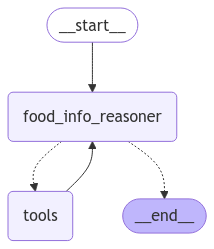

In [130]:
display(Image(food_information_graph.get_graph().draw_mermaid_png()))


In [131]:
messages = ["How to make Pizza?"]
messages = food_information_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()
# messages

2025-02-07 03:58:35 - -------------Food Information Reasoner----------------
2025-02-07 03:58:37 - HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-07 03:58:37 - Received response from LLM.
================================ Human Message =================================

How to make Pizza?
================================== Ai Message ==================================

 To find the recipe for making Pizza, I will use the web_search_tool function. Here is the query I will use:

```
web_search_tool(query: "Pizza recipe")
```

This query will search the web for a professional Pizza recipe. I will then analyze the results and provide you with a summary of the steps to make a delicious Pizza.

Here is the summary of the steps to make a Pizza:

1. Preheat the oven to 475°F (245°C).
2. Roll out the pizza dough on a floured surface to your desired thickness.
3. Spread a thin layer of pizza sauce over the dough, leaving a small border for the crust.
4. 

In [132]:
def food_search(food_name=None, restaurant_name=None, max_distance=1):
    """
    Search for foods based on food_name, restaurant_name, or both using edit distance.
    :param connection: SQLite database connection
    :param food_name: Food name to search for (optional)
    :param restaurant_name: Restaurant name to search for (optional)
    :param max_distance: Maximum allowed edit distance for a match
    :return: List of matching foods
    """
    connection = sqlite3.connect('..\Codes\food_orders.db')

    cursor = connection.cursor()
    cursor.execute("SELECT id, food_name, food_category, restaurant_name, price FROM foods")
    results = cursor.fetchall()

    matches = []
    for food_id, db_food_name, food_category, db_restaurant_name, db_price in results:
        food_name_distance = float('inf')
        restaurant_name_distance = float('inf')

        if food_name:
            food_name_distance_1 = Levenshtein.distance(food_name.lower(), db_food_name.lower(), weights=(0, 1, 1))
            food_name_distance_2 = Levenshtein.distance(food_name.lower(), db_food_name.lower(), weights=(1, 0, 1))
            food_name_distance_3 = Levenshtein.distance(food_name.lower(), db_food_name.lower(), weights=(1, 1, 1))
            food_name_distance = min(food_name_distance_1, food_name_distance_2, food_name_distance_3)


        if restaurant_name:
            restaurant_name_distance_1 = Levenshtein.distance(restaurant_name.lower(), db_restaurant_name.lower(), weights=(0, 1, 1))
            restaurant_name_distance_2 = Levenshtein.distance(restaurant_name.lower(), db_restaurant_name.lower(), weights=(1, 0, 1))
            restaurant_name_distance_3 = Levenshtein.distance(restaurant_name.lower(), db_restaurant_name.lower(), weights=(1, 1, 1))

            restaurant_name_distance = min(restaurant_name_distance_1, restaurant_name_distance_2, restaurant_name_distance_3)

        if food_name and restaurant_name:
            if food_name_distance <= max_distance and restaurant_name_distance <= max_distance:
                matches.append({
                    'id': food_id,
                    'food_name': db_food_name,
                    'food_category': food_category,
                    'restaurant_name': db_restaurant_name,
                    'price': db_price,
                    'edit_distance': min(food_name_distance, restaurant_name_distance)
                })
        elif food_name:
            if food_name_distance <= max_distance:
                matches.append({
                    'id': food_id,
                    'food_name': db_food_name,
                    'food_category': food_category,
                    'restaurant_name': db_restaurant_name,
                    'price': db_price,
                    'edit_distance': food_name_distance
                })
        elif restaurant_name:
            if restaurant_name_distance <= max_distance:
                matches.append({
                    'id': food_id,
                    'food_name': db_food_name,
                    'food_category': food_category,
                    'restaurant_name': db_restaurant_name,
                    'price': db_price,
                    'edit_distance': restaurant_name_distance
                })

    matches.sort(key=lambda x: x['edit_distance'])
    connection.close()
    return matches


def cancel_order(order_id, phone_number):
    """
    Cancel an order if its status is 'preparation'.
    :param connection: SQLite database connection
    :param order_id: ID of the order to cancel
    :return: Result message
    """
    connection = sqlite3.connect('..\Codes\food_orders.db')
    cursor = connection.cursor()

    cursor.execute("SELECT status FROM food_orders WHERE id = ? AND person_phone_number = ?", (order_id,phone_number))
    result = cursor.fetchone()

    if result is None:
        return f"Order ID {order_id} from {phone_number} does not exist."

    current_status = result[0]

    if current_status == "preparation":
        cursor.execute("UPDATE food_orders SET status = 'canceled' WHERE id = ?", (order_id,))
        connection.commit()
        connection.close()
        return f"Order ID {order_id} from {phone_number} has been successfully canceled."
    else:
        connection.close()
        return f"Order ID {order_id} from {phone_number} cannot be canceled as it is in '{current_status}' status."


def comment_order(order_id, person_name ,comment):
    """
    Add or overwrite a comment for an order.
    :param connection: SQLite database connection
    :param order_id: ID of the order to comment on
    :param comment: The comment to add or overwrite
    :return: Result message
    """
    connection = sqlite3.connect('..\Codes\food_orders.db')
    cursor = connection.cursor()

    cursor.execute("SELECT id FROM food_orders WHERE id = ?", (order_id,))
    result = cursor.fetchone()

    if result is None:
        return f"Order ID {order_id} does not exist."

    cursor.execute("UPDATE food_orders SET comment = ? WHERE id = ?", (comment, order_id))
    connection.commit()
    connection.close()
    return f"Comment for Order ID {order_id} from {person_name} has been updated."


def check_order_status(order_id):
    """
    Check the status of an order.
    :param connection: SQLite database connection
    :param order_id: ID of the order to check
    :return: Order status or an error message
    """
    connection = sqlite3.connect('..\Codes\food_orders.db')
    cursor = connection.cursor()

    cursor.execute("SELECT status FROM food_orders WHERE id = ?", (order_id,))
    result = cursor.fetchone()
    connection.close()
    if result is None:
        return f"Order ID {order_id} does not exist."

    return f"Order ID {order_id} from is currently in '{result[0]}' status."



In [133]:
class MyState(TypedDict):
    messages: str
    costumer_order_id: Optional[str]
    phone_number: Optional[str]
    status: Optional[str]
    person_name: Optional[str]
    comment: Optional[str]
    related_node: Optional[str]


In [134]:
# class IsRelated(BaseModel):
#     is_related_flag: str = Field(description="The decision that the query is related to which one of this nodes:\n\n1-'node_cancel_order': Cancels an order if the client requests.\n2-'node_comment_registeration': Registers the client's idea about an order.\n3-'node_order_status': If the clinet wanted to be aware of the order status.\n4-'node_other': If the clinet wanted something else.\nDo not put ' or \".")

# def is_related(MyState) -> Literal["node_cancel_order", "node_comment_registeration", "node_order_status", "node_other"]:
#     query = MyState["messages"]
#     llm_with_structured_output = gemini_chat.with_structured_output(IsRelated)
#     response = llm_with_structured_output.invoke(query)
#     print("-----Target Relation-----")
#     print(response)
#     if response.is_related_flag in ["1", "node_cancel_order"]:
#         return "node_cancel_order"

#     elif response.is_related_flag in ["2", "node_comment_registeration"]:
#         return "node_comment_registeration"

#     elif response.is_related_flag in ["3", "node_order_status"]:
#         return "node_order_status"

#     elif response.is_related_flag in ["4", "node_other"]:
#         return "node_other"


class IsRelated(BaseModel):
    is_related_flag: str = Field(
        description="The decision that the query is related to which one of these nodes:\n\n"
                    "1-'node_cancel_order': Cancels an order if the client requests.\n"
                    "2-'node_comment_registeration': Registers the client's idea about an order.\n"
                    "3-'node_order_status': If the client wanted to be aware of the order status.\n"
                    "4-'node_other': If the client wanted something else.\n"
                    "Do not put ' or \"."
    )

def is_related(MyState) -> Literal["node_cancel_order", "node_comment_registeration", "node_order_status", "node_other"]:
    query = MyState["messages"]

    logger.info("Received query for determining node relation.")
    logger.debug(f"User query: {query}")

    # Initialize the LLM with structured output
    llm_with_structured_output = gemini_chat.with_structured_output(IsRelated)

    # Invoke the LLM to get a response
    response = llm_with_structured_output.invoke(query)
    logger.info("Received response from LLM.")
    logger.debug(f"LLM response: {response}")

    # Log the target node relation decision
    logger.info("-----Target Relation-----")
    logger.info(f"Response flag: {response.is_related_flag}")

    # Determine and return the appropriate node
    if response.is_related_flag in ["1", "node_cancel_order"]:
        logger.info("Selected node: node_cancel_order")
        return "node_cancel_order"

    elif response.is_related_flag in ["2", "node_comment_registeration"]:
        logger.info("Selected node: node_comment_registeration")
        return "node_comment_registeration"

    elif response.is_related_flag in ["3", "node_order_status"]:
        logger.info("Selected node: node_order_status")
        return "node_order_status"

    elif response.is_related_flag in ["4", "node_other"]:
        logger.info("Selected node: node_other")
        return "node_other"

    # Log if an unexpected flag is received
    logger.warning(f"Unexpected response flag: {response.is_related_flag}. Returning 'node_other' by default.")
    return "node_other"


In [135]:
# # Specify a thread
# config = {"configurable": {"thread_id": "1"}}
# messages = []
# node_states = []

# def node_initial(state: MyState) -> MyState:
#     """
#     Gathers the Order ID for the next nodes.
#     """
#     print("---Initial Node---")
#     user_query = state["messages"]

#     print(user_query)

#     details = f"Please extract the details from this text in this format: 'order_id,phone_number,person_name'. Please return None for each of them if it was not filled. Your output should be just the values, not order_id, phone_number and person_name words:\n\n{user_query}"

#     invoke = gemini_chat.invoke(details).content
#     print(invoke)
#     order_id, phone_number, person_name = invoke.split(",")

#     state["costumer_order_id"] = order_id
#     state["phone_number"] = phone_number
#     state["person_name"] = person_name

#     return state


# def node_cancel_order(state: MyState) -> MyState:
#     """
#     Cancels an order if the client requests.
#     """
#     print("---Node Cancel Order---")
#     global node_states, messages
#     node_states.append("node_cancel_order")

#     if len(node_states)>1 and node_states[-1] != node_states[-2]:
#         print("New Node")
#         messages = [messages[-1]]
#         node_states = [node_states[-1]]

#     if state["costumer_order_id"] == 'None' and state["phone_number"] == 'None':
#         print("Order canceled failed; Please provide your order ID and Phone Number.")
#         state["status"] = "not exist"

#     elif state["costumer_order_id"] == 'None':
#         print("Order canceled failed; Please provide your order ID too.")
#         state["status"] = "not exist"

#     elif state["phone_number"] == 'None':
#         print("Order canceled failed; Please provide Phone Number too.")
#         state["status"] = "not exist"

#     elif "delivered" in cancel_order(state["costumer_order_id"], state["phone_number"]):
#         print("Order canceled failed; Order is already delivered")
#         state["status"] = "delivered"

#     elif "not exist." in cancel_order(state["costumer_order_id"], state["phone_number"]):
#         print("Order canceled failed; Order not exists.")
#         state["status"] = "not exist"

#     elif "canceled" in cancel_order(state["costumer_order_id"], state["phone_number"]):
#         print("Order is alreardy canceled.")
#         state["status"] = "canceled"

#     else:
#         print("Order canceled successfully.")
#         state["status"] = "canceled"

#     return state

# def node_comment_registeration(state: MyState) -> MyState:
#     """
#     Registers the client's idea about an order.
#     """
#     print("---Node Comment Registeration---")
#     global node_states, messages
#     user_query = state["messages"]
#     node_states.append("node_comment_registeration")

#     if len(node_states)>1 and node_states[-1] != node_states[-2]:
#         print("New Node")
#         messages = [messages[-1]]
#         node_states = [node_states[-1]]

#     comment = f"Please extract the comment from this text in this format: 'comment'. Please return None if it was not filled:\n\n{user_query}"

#     invoke = gemini_chat.invoke(comment).content
#     if invoke != "None" and state["costumer_order_id"] != "None":
#         comment = invoke
#         print(comment_order(state["costumer_order_id"], state["person_name"], comment))

#     elif state["person_name"] == "None":
#         print("Comment Registeration failed; Please provide your name.")
#         comment = "None"

#     elif state["costumer_order_id"] == "None":
#         print("Comment Registeration failed; Please provide your order ID.")
#         comment = "None"

#     else:
#         print(comment_order(state["costumer_order_id"], state["person_name"], comment))
#         state["comment"] = comment


#     return state

# def node_order_status(state: MyState) -> MyState:
#     """
#     If the clinet wanted to be aware of the order status.
#     """
#     print("---Node Track Order Status---")
#     global node_states, messages

#     node_states.append("node_order_status")
#     if len(node_states)>1 and node_states[-1] != node_states[-2]:
#         print("New Node")
#         messages = [messages[-1]]
#         node_states = [node_states[-1]]

#     if state["costumer_order_id"] != "None":
#         print(check_order_status(state["costumer_order_id"]))

#     else:
#         print("Order status failed; Please provide your order ID.")

#     return state

# def node_other(state: MyState) -> MyState:
#     """
#     If the clinet wanted something else.
#     """
#     print("---Node Other Requests---")
#     global node_states, messages
#     node_states.append("node_other")
#     if len(node_states)>1 and node_states[-1] != node_states[-2]:
#         print("New Node")
#         messages = [messages[-1]]
#         node_states = [node_states[-1]]
#     print("Please keep your request in this 3 field:\nCancel The Order\nComment Registeration\nTrack Order Status")

#     return state

# Specify a thread
config = {"configurable": {"thread_id": "1"}}
messages = []
node_states = []

def node_initial(state: MyState) -> MyState:
    """
    Gathers the Order ID for the next nodes.
    """
    logger.info("---Initial Node---")
    user_query = state["messages"]

    logger.info(f"User query: {user_query}")

    details = f"Please extract the details from this text in this format: 'order_id,phone_number,person_name'. Please return None for each of them if it was not filled. Your output should be just the values, not order_id, phone_number and person_name words:\n\n{user_query}"

    invoke = gemini_chat.invoke(details).content
    logger.info(f"Invoke response: {invoke}")
    order_id, phone_number, person_name = invoke.split(",")

    state["costumer_order_id"] = order_id
    state["phone_number"] = phone_number
    state["person_name"] = person_name

    return state


def node_cancel_order(state: MyState) -> MyState:
    """
    Cancels an order if the client requests.
    """
    logger.info("---Node Cancel Order---")
    global node_states, messages
    node_states.append("node_cancel_order")

    if len(node_states)>1 and node_states[-1] != node_states[-2]:
        logger.info("New Node")
        messages = [messages[-1]]
        node_states = [node_states[-1]]

    if state["costumer_order_id"] == 'None' and state["phone_number"] == 'None':
        logger.warning("Order canceled failed; Please provide your order ID and Phone Number.")
        state["status"] = "not exist"

    elif state["costumer_order_id"] == 'None':
        logger.warning("Order canceled failed; Please provide your order ID too.")
        state["status"] = "not exist"

    elif state["phone_number"] == 'None':
        logger.warning("Order canceled failed; Please provide Phone Number too.")
        state["status"] = "not exist"

    elif "delivered" in cancel_order(state["costumer_order_id"], state["phone_number"]):
        logger.warning("Order canceled failed; Order is already delivered")
        state["status"] = "delivered"

    elif "not exist." in cancel_order(state["costumer_order_id"], state["phone_number"]):
        logger.warning("Order canceled failed; Order not exists.")
        state["status"] = "not exist"

    elif "canceled" in cancel_order(state["costumer_order_id"], state["phone_number"]):
        logger.warning("Order is already canceled.")
        state["status"] = "canceled"

    else:
        logger.info("Order canceled successfully.")
        state["status"] = "canceled"

    return state

def node_comment_registeration(state: MyState) -> MyState:
    """
    Registers the client's idea about an order.
    """
    logger.info("---Node Comment Registeration---")
    global node_states, messages
    user_query = state["messages"]
    node_states.append("node_comment_registeration")

    if len(node_states)>1 and node_states[-1] != node_states[-2]:
        logger.info("New Node")
        messages = [messages[-1]]
        node_states = [node_states[-1]]

    comment = f"Please extract the comment from this text in this format: 'comment'. Please return None if it was not filled:\n\n{user_query}"

    invoke = gemini_chat.invoke(comment).content
    if invoke != "None" and state["costumer_order_id"] != "None":
        comment = invoke
        logger.info(f"Comment: {comment}")
        logger.info(comment_order(state["costumer_order_id"], state["person_name"], comment))

    elif state["person_name"] == "None":
        logger.warning("Comment Registration failed; Please provide your name.")
        comment = "None"

    elif state["costumer_order_id"] == "None":
        logger.warning("Comment Registration failed; Please provide your order ID.")
        comment = "None"

    else:
        logger.info(comment_order(state["costumer_order_id"], state["person_name"], comment))
        state["comment"] = comment

    return state

def node_order_status(state: MyState) -> MyState:
    """
    If the client wanted to be aware of the order status.
    """
    logger.info("---Node Track Order Status---")
    global node_states, messages

    node_states.append("node_order_status")
    if len(node_states)>1 and node_states[-1] != node_states[-2]:
        logger.info("New Node")
        messages = [messages[-1]]
        node_states = [node_states[-1]]

    if state["costumer_order_id"] != "None":
        logger.info(f"Order Status: {check_order_status(state['costumer_order_id'])}")

    else:
        logger.warning("Order status failed; Please provide your order ID.")

    return state

def node_other(state: MyState) -> MyState:
    """
    If the client wanted something else.
    """
    logger.info("---Node Other Requests---")
    global node_states, messages
    node_states.append("node_other")
    if len(node_states)>1 and node_states[-1] != node_states[-2]:
        logger.info("New Node")
        messages = [messages[-1]]
        node_states = [node_states[-1]]
    logger.info("Please keep your request in this 3 field:\nCancel The Order\nComment Registeration\nTrack Order Status")

    return state




In [136]:
memory = MemorySaver()

# Build the graph
builder = StateGraph(MyState)

# Add nodes
builder.add_node("node_initial", node_initial)
builder.add_node("node_cancel_order", node_cancel_order)
builder.add_node("node_comment_registeration", node_comment_registeration)
builder.add_node("node_order_status", node_order_status)
builder.add_node("node_other", node_other)

# Add edges (linear flow)
builder.add_edge(START, "node_initial")

builder.add_conditional_edges("node_initial", is_related)
builder.add_edge("node_cancel_order", END)
builder.add_edge("node_comment_registeration", END)
builder.add_edge("node_order_status", END)
builder.add_edge("node_other", END)

# Compile the graph
advanced_order_graph = builder.compile(checkpointer=memory)


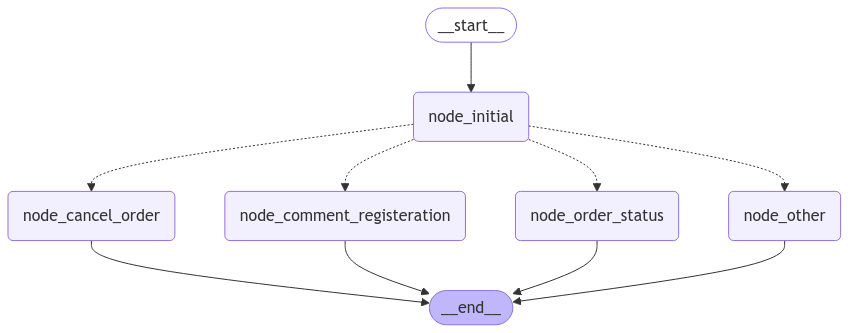

In [137]:
display(Image(advanced_order_graph.get_graph().draw_mermaid_png()))


In [138]:
# while True:
#     messages.append(HumanMessage(content=f"{input()}"))
#     # print(messages)

#     final_state = advanced_order_graph.invoke({"user_query": messages},config)

#     # for m in final_state['user_query']:
#     #     m.pretty_print()


In [153]:
def food_search(food_name=None, restaurant_name=None, max_distance=1):
    """
    Search for foods based on food_name, restaurant_name, or both using edit distance.
    :param connection: SQLite database connection
    :param food_name: Food name to search for (optional)
    :param restaurant_name: Restaurant name to search for (optional)
    :param max_distance: Maximum allowed edit distance for a match
    :return: List of matching foods
    """
    db_path = os.path.abspath("../Codes/food_orders.db")
    connection = sqlite3.connect(db_path)

    cursor = connection.cursor()
    cursor.execute("SELECT id, food_name, food_category, restaurant_name, price FROM foods")
    results = cursor.fetchall()

    matches = []
    for food_id, db_food_name, food_category, db_restaurant_name, db_price in results:
        food_name_distance = float('inf')
        restaurant_name_distance = float('inf')

        if food_name:
            food_name_distance_1 = Levenshtein.distance(food_name.lower(), db_food_name.lower(), weights=(0, 1, 1))
            food_name_distance_2 = Levenshtein.distance(food_name.lower(), db_food_name.lower(), weights=(1, 0, 1))
            food_name_distance_3 = Levenshtein.distance(food_name.lower(), db_food_name.lower(), weights=(1, 1, 1))
            food_name_distance = min(food_name_distance_1, food_name_distance_2, food_name_distance_3)


        if restaurant_name:
            restaurant_name_distance_1 = Levenshtein.distance(restaurant_name.lower(), db_restaurant_name.lower(), weights=(0, 1, 1))
            restaurant_name_distance_2 = Levenshtein.distance(restaurant_name.lower(), db_restaurant_name.lower(), weights=(1, 0, 1))
            restaurant_name_distance_3 = Levenshtein.distance(restaurant_name.lower(), db_restaurant_name.lower(), weights=(1, 1, 1))

            restaurant_name_distance = min(restaurant_name_distance_1, restaurant_name_distance_2, restaurant_name_distance_3)

        if food_name and restaurant_name:
            if food_name_distance <= max_distance and restaurant_name_distance <= max_distance:
                matches.append({
                    'id': food_id,
                    'food_name': db_food_name,
                    'food_category': food_category,
                    'restaurant_name': db_restaurant_name,
                    'price': db_price,
                    'edit_distance': min(food_name_distance, restaurant_name_distance)
                })
        elif food_name:
            if food_name_distance <= max_distance:
                matches.append({
                    'id': food_id,
                    'food_name': db_food_name,
                    'food_category': food_category,
                    'restaurant_name': db_restaurant_name,
                    'price': db_price,
                    'edit_distance': food_name_distance
                })
        elif restaurant_name:
            if restaurant_name_distance <= max_distance:
                matches.append({
                    'id': food_id,
                    'food_name': db_food_name,
                    'food_category': food_category,
                    'restaurant_name': db_restaurant_name,
                    'price': db_price,
                    'edit_distance': restaurant_name_distance
                })

    matches.sort(key=lambda x: x['edit_distance'])
    connection.close()
    return matches


In [154]:
class MyState_Food_Search(TypedDict):
    messages: str
    food_id: Optional[str]
    food_name: Optional[str]
    food_category: Optional[str]
    restaurant_name: Optional[str]
    price: Optional[str]
    edit_distance: Optional[str]


In [155]:
# def node_search_food(state: MyState) -> MyState:
#     """
#     Gives the details of a food by its name or restaurant name.
#     """
#     print("---Search Food Node---")
#     user_query = state["messages"]

#     details = f"Please extract the food_name and the restaurant_name from this query in this format: 'food_name,restaurant_name'. Please return None for each of them if it was not found.:\n\n{user_query}"

#     invoke = gemini_chat.invoke(details).content

#     food_name, restaurant_name = invoke.split(",")

#     matches = food_search(food_name, restaurant_name)

#     generated_text = f"Please consider this query: {user_query}\n\nGenerate a text considering the query and following matches:\n{matches}\n\nGenerate sentences and consider multiple details if there were multiple matches"

#     response = gemini_chat.invoke(generated_text).content
#     print(response)

#     return state

def node_search_food(state: MyState) -> MyState:
    """
    Gives the details of a food by its name or restaurant name.
    """
    logger.info("---Search Food Node---")

    user_query = state["messages"]
    logger.debug(f"User query: {user_query}")

    # Step 1: Ask LLM to extract food_name and restaurant_name
    details = f"Please extract the food_name and the restaurant_name from this query in this format: 'food_name,restaurant_name'. Please return None for each of them if it was not found.:\n\n{user_query}"
    logger.debug(f"Sending request to LLM to extract details: {details}")

    invoke = gemini_chat.invoke(details).content
    logger.info(f"LLM response for details extraction: {invoke}")

    try:
        food_name, restaurant_name = invoke.split(",")
        logger.debug(f"Extracted food_name: {food_name}, restaurant_name: {restaurant_name}")
    except ValueError as e:
        logger.error(f"Error splitting LLM response: {invoke}. Exception: {e}")
        food_name, restaurant_name = "None", "None"

    # Step 2: Perform search using extracted food_name and restaurant_name
    matches = food_search(food_name, restaurant_name)
    logger.info(f"Search results for food_name '{food_name}' and restaurant_name '{restaurant_name}': {matches}")

    # Step 3: Generate response using search matches
    generated_text = (f"Please consider this query: {user_query}\n\n"
                      f"Generate a text considering the query and following matches:\n{matches}\n\n"
                      "Generate sentences and consider multiple details if there were multiple matches")
    logger.debug(f"Sending request to LLM to generate text: {generated_text}")

    response = gemini_chat.invoke(generated_text).content
    logger.info(f"Generated response from LLM: {response}")

    # Store or process response (currently just returning state as per the original code)
    return state


In [156]:
# Build the graph
builder = StateGraph(MyState)

# Add nodes
builder.add_node("node_search_food", node_search_food)

# Add edges (linear flow)
builder.add_edge(START, "node_search_food")
builder.add_edge("node_search_food", END)

# Compile the graph
advanced_search_graph = builder.compile(checkpointer=memory)


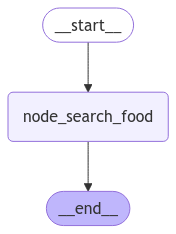

In [157]:
display(Image(advanced_search_graph.get_graph().draw_mermaid_png()))


In [158]:
user_input = {"messages": "How much is Ghorme Sabzi at Golestan Restaurant?"}

final_state = advanced_search_graph.invoke(user_input, config)


2025-02-07 04:04:35 - ---Search Food Node---
2025-02-07 04:04:37 - HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-07 04:04:37 - LLM response for details extraction:  food_name: Ghorme Sabzi, restaurant_name: Golestan Restaurant
2025-02-07 04:04:37 - Search results for food_name ' food_name: Ghorme Sabzi' and restaurant_name ' restaurant_name: Golestan Restaurant': [{'id': 219, 'food_name': 'Gormeh Sabzi', 'food_category': 'persian_food', 'restaurant_name': 'Golestan Restaurant', 'price': 14.99, 'edit_distance': 0}, {'id': 47, 'food_name': 'Ghormeh Sabzi', 'food_category': 'persian_food', 'restaurant_name': 'Rumi', 'price': 13.99, 'edit_distance': 1}]
2025-02-07 04:04:38 - HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-07 04:04:38 - Generated response from LLM:  Based on the data provided, the price of Ghorme Sabzi at Golestan Restaurant is $14.99. However, it's also available at Rumi restaurant for $1

In [152]:
db_path = os.path.abspath("../Codes/food_orders.db")

# Connect using the absolute path
connection = sqlite3.connect(db_path)

In [159]:


results = []

def search_tool(query: str) -> str:
    """
    Search the database for the contents similar to the query.
    A very clever tool to get knowledge about foods.

    Args:
        query: The query to search for.
    """
    global results

    logger.info("-----------SEARCHING Tool----------")
    logger.info(f"Searching for query: {query}")

    # Simulating search and storing results
    try:
        # results = TavilySearchResults(max_results=3).invoke(query)
        results = [tbl.search(query, query_type="hybrid").limit(10).to_pandas()]
        logger.info(f"Search results retrieved: {results}")
    except Exception as e:
        logger.error(f"Error while searching the database: {e}")
        return "An error occurred while searching. Please try again later."

    # Generating the first response based on search results
    response = gemini_chat.invoke(
        f"This is the query:\n'{query}'\nSuggest a good food based on the responses gotten from the database "
        f"(if there was nothing, suggest from yourself):\n{results}\n"
        "Do not let anybody know there was nothing in results."
    ).content
    logger.info(f"LLM response for food suggestion: {response}")

    # Extracting the food name from the response
    food_name = gemini_chat.invoke(
        f"This is the query:\n'{response}'\nFind the food name and return it in this format: food_name. "
        "Do not use the word 'food_name' and return 'None' if it was not mentioned."
    ).content
    logger.info(f"Extracted food name: {food_name}")

    # Call the node_search_food function with the extracted food name
    response_2 = node_search_food(food_name)
    logger.info(f"Response from node_search_food: {response_2}")

    # Final response combining both outputs
    final_response = f"{response}. The restaurant details: {response_2}"
    logger.info(f"Final response: {final_response}")

    return final_response


def node_search_food(query: str) -> str:
    """
    A very powerful tool that gives the details of a food by its name or restaurant name.

    Args:
        query: The query of the food name or the restaurant name.
    """
    logger.info("---Search Food Node---")
    logger.debug(f"Query to search food details: {query}")

    # Step 1: Extract details
    details = (f"Please extract the food_name and the restaurant_name from this query in this format: "
               f"'food_name,restaurant_name'. Please return None for each of them if it was not found.:\n\n{query}")
    logger.debug(f"LLM request for extracting food details: {details}")

    invoke = gemini_chat.invoke(details).content
    logger.info(f"LLM response for food and restaurant extraction: {invoke}")

    try:
        food_name, restaurant_name = invoke.split(",")
        logger.debug(f"Extracted food_name: {food_name}, restaurant_name: {restaurant_name}")
    except ValueError as e:
        logger.error(f"Error splitting LLM response: {invoke}. Exception: {e}")
        food_name, restaurant_name = "None", "None"

    # Step 2: Search for matches
    matches = food_search(food_name, restaurant_name)
    logger.info(f"Search results for food_name '{food_name}' and restaurant_name '{restaurant_name}': {matches}")

    # Step 3: Generate a detailed response based on search results
    generated_text = (f"Please consider this query: {query}\n\n"
                      f"Generate a text considering the query and following matches:\n{matches}\n\n"
                      "Generate sentences and consider multiple details (including the cost) if there were multiple matches. "
                      "Return 'No restaurant has this food currently' if it was not related to any matches.")
    logger.debug(f"LLM request for generating response: {generated_text}")

    response = gemini_chat.invoke(generated_text).content
    logger.info(f"Generated response from LLM: {response}")

    return response


In [161]:
tools = [search_tool, node_search_food]
llm_with_tools = gemini_chat.bind_tools(tools)


In [162]:
# sys_msg = SystemMessage(
#     content="You are a helpful suggestor, suggest the client base on what he wants. without mentioning additional things. You <must> use your tools and just use your tools if it was about food and you <must> provide datails about the restaurants along with the costs(if restaurant was not available: something like no restaurant found). This is ther order:\nInitially suggest the food\nthen provide restaurant details")

# def reasoner(state: MessagesState):
#     print("-------------Reasoner----------------")
#     messages = [sys_msg] + state["messages"]

#     response = llm_with_tools.invoke(messages)

#     print("Response: ")
#     print(response)
#     return {"messages": [response]}

sys_msg = SystemMessage(
    content=(
        "You are a helpful suggestor, suggest the client based on what he wants without mentioning additional things. "
        "You <must> use your tools and just use your tools if it was about food, and you <must> provide details about the restaurants along with the costs "
        "(if a restaurant was not available: mention 'no restaurant found'). This is the order:\n"
        "Initially suggest the food, then provide restaurant details."
    )
)

def reasoner(state: MessagesState):
    """
    Handles the reasoning process by invoking the LLM with tools based on the system message and user messages.
    """
    logger.info("-------------Reasoner----------------")
    logger.debug(f"Initial system message: {sys_msg.content}")

    # Combine system message with user messages
    messages = [sys_msg] + state["messages"]
    logger.debug(f"Combined messages for LLM invocation: {[msg.content for msg in messages]}")

    try:
        # Invoke the LLM with the combined messages
        response = llm_with_tools.invoke(messages)
        logger.info("Received response from LLM.")
        logger.debug(f"LLM response: {response.content}")

    except Exception as e:
        logger.error(f"Error while invoking LLM with tools: {e}")
        return {"messages": [f"An error occurred: {e}"]}

    # Return the response
    return {"messages": [response]}


In [163]:
# Graph
builder = StateGraph(MessagesState)

# Add nodes
builder.add_node("reasoner", reasoner)
builder.add_node("tools", ToolNode(tools))

# Add edges
builder.add_edge(START, "reasoner")
builder.add_conditional_edges(
    "reasoner",
    # If the latest message (result) from node reasoner is a tool call -> tools_condition routes to tools
    # If the latest message (result) from node reasoner is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "reasoner")
react_graph = builder.compile(checkpointer=memory)


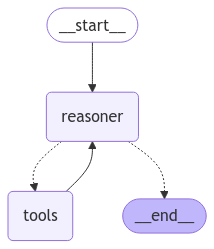

In [164]:
# Display the graph
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))


In [165]:
messages = ["I want an Iranian food"]
messages = react_graph.invoke({"messages": messages}, config)


2025-02-07 04:05:43 - -------------Reasoner----------------
2025-02-07 04:05:45 - HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-07 04:05:45 - Received response from LLM.


In [166]:
# class CombinedMyState(TypedDict):
#     messages: str

# def node_initial(state: CombinedMyState) -> CombinedMyState:
#     """
#     """

#     return state


# class CombinedIsRelated(BaseModel):
#     is_related_flag: str = Field(description="The decision that the query is related to which one of this nodes:\n\n1-'advanced_order_graph': requests about an order and manipulation on it.\n2-'advanced_search_graph': requests about food's details, like its price, the restaurant and like this.\n3-'react_graph': requests which have a suggestion about food inside it.\n4-'node_other': If the clinet wanted something else.\nDo not put ' or \".")


# from typing import Literal

# def combined_is_related(CombinedMyState) -> Literal["advanced_order_graph", "advanced_search_graph", "react_graph", "node_other"]:
#     query = CombinedMyState["messages"]
#     llm_with_structured_output = gemini_chat.with_structured_output(CombinedIsRelated)
#     response = llm_with_structured_output.invoke(query)
#     print("-----Target Relation-----")
#     print(response)
#     if response.is_related_flag in ["1", "advanced_order_graph"]:
#         return "advanced_order_graph"

#     elif response.is_related_flag in ["2", "advanced_search_graph"]:
#         return "advanced_search_graph"

#     elif response.is_related_flag in ["3", "react_graph"]:
#         return "react_graph"

#     elif response.is_related_flag in ["4", "node_other"]:
#         return "node_other"

class CombinedMyState(TypedDict):
    messages: str

def node_initial(state: CombinedMyState) -> CombinedMyState:
    """
    A placeholder function that returns the current state as it is.
    """
    logger.info("Node Initial function called.")
    return state

class CombinedIsRelated(BaseModel):
    is_related_flag: str = Field(
        description="The decision that the query is related to which one of these nodes:\n\n"
                    "1-'advanced_order_graph': requests about an order and manipulation on it.\n"
                    "2-'advanced_search_graph': requests about food's details, like its price, the restaurant and similar details.\n"
                    "3-'react_graph': requests which have a suggestion about food inside them.\n"
                    "4-'food_information_graph': If the client wanted some general or professional details about food, like asking recipie.\n"
                    "5-'node_other': If the client wanted something else.\n"
                    "Do not put ' or \" in the response."
    )

def combined_is_related(state: CombinedMyState) -> Literal["advanced_order_graph", "advanced_search_graph", "react_graph", "food_information_graph", "node_other"]:
    query = state["messages"]
    logger.info("Determining the target relation for the query.")
    logger.debug(f"User query: {query}")

    try:
        # Invoke the LLM with structured output
        llm_with_structured_output = gemini_chat.with_structured_output(CombinedIsRelated)
        response = llm_with_structured_output.invoke(query)
        logger.info("Received response from LLM.")
        logger.debug(f"LLM response: {response}")

        # Determine the target node based on the LLM response
        if response.is_related_flag in ["1", "advanced_order_graph"]:
            logger.info("Target node determined: advanced_order_graph")
            print(1)
            return "advanced_order_graph"

        elif response.is_related_flag in ["2", "advanced_search_graph"]:
            logger.info("Target node determined: advanced_search_graph")
            print(2)
            return "advanced_search_graph"

        elif response.is_related_flag in ["3", "react_graph"]:
            logger.info("Target node determined: react_graph")
            print(3)
            return "react_graph"

        elif response.is_related_flag in ["4", "food_information_graph"]:
            logger.info("Target node determined: food_information_graph")
            print(4)
            return "food_information_graph"

        elif response.is_related_flag in ["5", "node_other"]:
            logger.info("Target node determined: node_other")
            print(5)
            return "node_other"

        else:
            logger.warning(f"Unexpected response flag: {response.is_related_flag}. Defaulting to 'node_other'.")
            print(6)
            return "node_other"

    except Exception as e:
        logger.error(f"Error while determining the target relation: {e}")
        return "node_other"


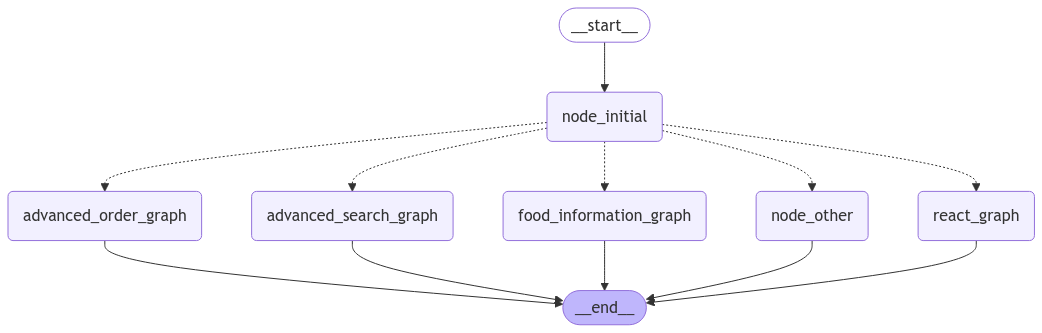

In [167]:
# Build the graph
builder = StateGraph(CombinedMyState)

# Add nodes
builder.add_node("node_initial", node_initial)
builder.add_node("advanced_order_graph", advanced_order_graph)
builder.add_node("advanced_search_graph", advanced_search_graph)
builder.add_node("react_graph", react_graph)
builder.add_node("food_information_graph", food_information_graph)
builder.add_node("node_other", node_other)

# Add edges (linear flow)
builder.add_edge(START, "node_initial")

builder.add_conditional_edges("node_initial", combined_is_related)
builder.add_edge("food_information_graph", END)
builder.add_edge("advanced_order_graph", END)
builder.add_edge("advanced_search_graph", END)
builder.add_edge("react_graph", END)
builder.add_edge("node_other", END)

# Compile the graph
combined_graph = builder.compile(checkpointer=memory)

display(Image(combined_graph.get_graph().draw_mermaid_png()))


In [168]:
messages = ["I want a spicy food"]
messages = combined_graph.invoke({"messages": messages}, config)


2025-02-07 04:06:03 - Node Initial function called.
2025-02-07 04:06:03 - Determining the target relation for the query.
2025-02-07 04:06:05 - HTTP Request: POST https://api.together.xyz/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-07 04:06:05 - Received response from LLM.
2025-02-07 04:06:05 - Error while determining the target relation: 'NoneType' object has no attribute 'is_related_flag'
2025-02-07 04:06:05 - ---Node Other Requests---
2025-02-07 04:06:05 - Please keep your request in this 3 field:
Cancel The Order
Comment Registeration
Track Order Status


In [106]:
memory = MemorySaver()
graph = combined_graph

@cl.on_chat_start
async def on_chat_start():
    model = graph
    cl.user_session.set("runnable", model)
    cl.Message(content="Hello! I am a chatbot. How can I help you?").send()

@cl.on_message
async def on_message(message: cl.Message):
    config = {"configurable": {"thread_id": cl.context.session.id}}
    cb = cl.LangchainCallbackHandler()

    # graph.get_state(config)
    final_answer = cl.Message(content="")
    this_time_messages = []
    for msg, metadata in graph.stream({"messages": HumanMessage(content=message.content)}, stream_mode="messages", config=RunnableConfig(callbacks=[cb], **config)):
        this_time_messages.append(msg)
        if not isinstance(msg, AIMessage):
            continue
        await final_answer.stream_token(msg.content)
    cl.user_session.set("messages", this_time_messages)
    await final_answer.send()
